In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [2]:
nfts = pd.read_csv('/content/nfts_train - nfts_train.csv')
nfts.head()

,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000,250,False,False,True,True,False,31,187.967742,8.290323,60.935484,0.0,0.0,2.0,591.0,28.0,380.0
1,1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0.0,0.0,7.0,402.0,47.0,239.0
2,2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0.0,0.0,7.0,402.0,47.0,239.0
3,3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0.0,0.0,7.0,402.0,47.0,239.0
4,4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0.0,0.0,7.0,402.0,47.0,239.0


In [10]:
pd.pivot_table(data=nfts, index='verification_status', columns='contract_type', values=['rarity_score', 'last_sale_price'])

,last_sale_price,rarity_score
contract_type,own,own
verification_status,,
verified,1.641857,432.003172


In [ ]:
pd.pivot_table()

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [11]:
cars = pd.read_csv('/content/carvana - carvana.csv')
cars.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [15]:
# extracting the brand name
cars['brand'] = cars['Name'].str.split(' ').str.get(0)

In [27]:
# fixing the year column
cars['Year'] = cars['Year'].astype(str).str[:4].astype(int)

In [34]:
filt = (cars['Year']>=2018) & (cars['Year']<=2022)
temp = cars[filt]

In [38]:
pivot = pd.pivot_table(data=temp, index='brand', columns='Year', values=['Price', 'Miles'], aggfunc={'Miles':'median', 'Price':'mean'})

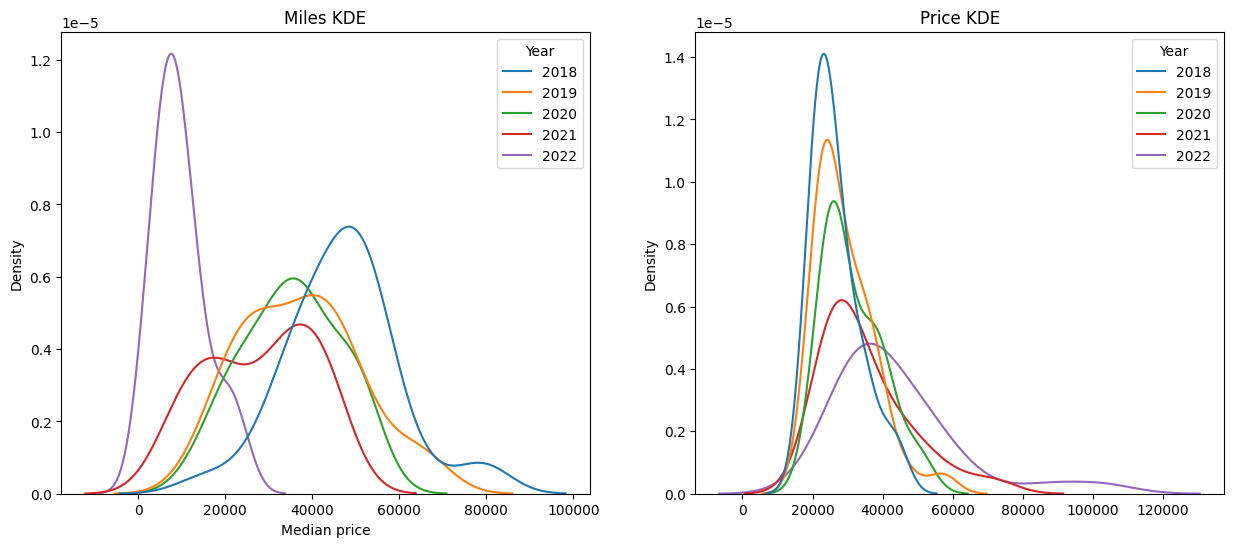

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.kdeplot(pivot['Miles'], ax=ax1)
ax1.set_title('Miles KDE')
ax1.set_xlabel('Average miles')

# kde for price
sns.kdeplot(pivot['Price'], ax=ax2)
ax2.set_title('Price KDE')
ax1.set_xlabel('Median price')

plt.show()

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [50]:
power = pd.read_csv('/content/PowerGeneration - PowerGeneration.csv')
power.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0.0,13.0,18.0,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0.0,28.0,7.0,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0.0,40.0,46.0,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0.0,14.0,23.0,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0.0,39.0,17.0,-21.69,0.0


In [53]:
power['Required'] = power['Actual(MU)'] - power['Excess(+) / Shortfall (-)']

In [88]:
power['Dates'] = pd.to_datetime(power['Dates'])
power['Month'] = power['Dates'].dt.month

In [71]:
# top 10 most frequenct power stations
top_10 = power['Power Station'].value_counts().head(10).index.tolist()

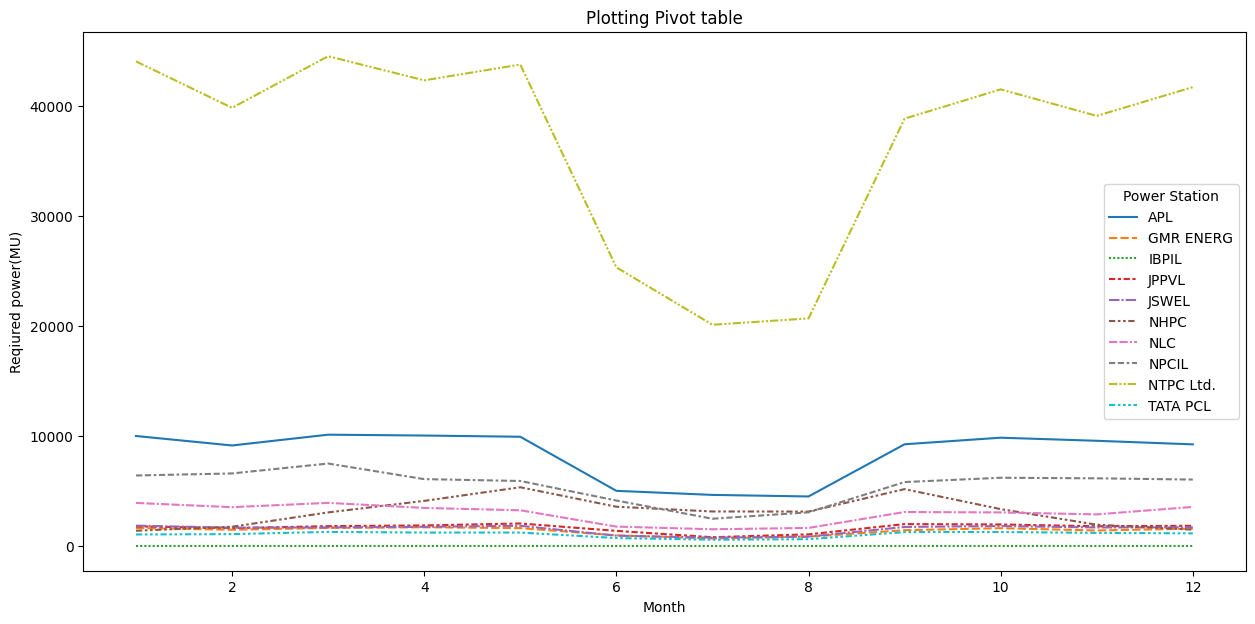

In [89]:
# filtering data so that it only has data about top 10 power stations
temp = power[power['Power Station'].isin(top_10)]

# forming the pivot table
pivot = pd.pivot_table(data=temp, index='Month', columns='Power Station', values='Required', aggfunc='sum')

# plotting the pivot table
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(pivot, ax=ax)
plt.xlabel('Month')
plt.ylabel('Reqiured power(MU)')
plt.title('Plotting Pivot table')
plt.show()

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [104]:
questions = pd.read_csv('/content/question-answer.csv').drop(columns='Unnamed: 0')

questions.rename(columns={'2':'text'}, inplace=True)
questions.head()

,text
0,Q1-What is Data Science?
1,"Ans1-Data Science combines statistics, maths, ..."
2,Q2-2. How is logistic regression done?
3,Ans2-Logistic regression measures the relation...
4,Q3-How do you build a random forest model?


In [98]:
import re
text = 'Q1-What is Data Science?'
pattern = r'(Q\d+)-(.+?)(?=(Q\d+)|$)'

re.findall(pattern, text)

[('Q1', 'What is Data Science?', '')]

In [99]:
text = 'Ans1-Data Science combines statistics, maths, ..'
pattern = r'(Ans\d+)-(.+?)(?=(Ans\d+)|$)'

re.findall(pattern, text)

[('Ans1', 'Data Science combines statistics, maths, ..', '')]

In [121]:
questions.drop(columns=['questions', 'answers'], inplace=True)

In [128]:
ques = questions[questions['text'].str.startswith('Q')]['text'].str.split('-').str.get(1).str.replace('2.','').reset_index()

<ipython-input-128-8e03d4c896d6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ques = questions[questions['text'].str.startswith('Q')]['text'].str.split('-').str.get(1).str.replace('2.','').reset_index()


In [130]:
ans = questions[questions['text'].str.startswith('A')]['text'].str.split('-').str.get(1).reset_index()

In [134]:
ques.columns

Index(['index', 'text'], dtype='object')

In [139]:
final_df = ques.merge(ans, left_index=True, right_index=True).drop(columns=['index_x', 'index_y'])
final_df.rename(columns={'text_x':'question', 'text_y':'answer'}, inplace=True)

In [140]:
final_df.head()

,question,answer
0,What is Data Science?,"Data Science combines statistics, maths, speci..."
1,How is logistic regression done?,Logistic regression measures the relationship ...
2,How do you build a random forest model?,A random forest is built up of a number of dec...
3,How can you avoid overfitting your model?,Overfitting refers to a model that is only set...
4,You are given a data set consisting of variabl...,The following are ways to handle missing data ...


###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [145]:
final_df[~final_df['question'].str.contains('\?')]

# there are no questions that have no question mark

,question,answer


###`Q 6-10` LOG and EMPLOYEE<br>
6. Show `activity` details month wise. Show count for each `activity`<br>
7. Find employee who did most `activity` in January month.<br>
8. Employee who have worked most no of times on Weekends.<br>
9. Which activity is logged most on buisness days.<br>
10. Week Days wise activity table.<br>
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")<br>
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")<br>

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [2]:
import pandas as pd
import numpy as np

In [89]:
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [4]:
log_file

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery
...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC
361,1361,2023-01-03,Dept4,116,Checking,Server
362,1362,2023-01-04,Dept4,110,Checking,CPU
363,1363,2023-01-05,Dept4,102,Inspection,AC


In [90]:
log_file['dt'] = pd.to_datetime(log_file['dt'])
log_file['month'] = log_file['dt'].dt.month_name()

pd.pivot_table(data=log_file, index='month', columns='activity', aggfunc='count')['Log_ID']

activity,Checking,Cleaning,Inspection,Repair
month,,,,
April,5,11,9,5
August,8,10,9,4
December,6,7,12,6
February,7,7,4,10
January,7,10,9,5
July,6,6,14,5
June,5,7,8,10
March,8,6,5,12
May,5,8,7,11


In [91]:
# 7
log_file[log_file['month'] == 'January'].groupby('emp_id')['activity'].count().sort_values(ascending=False).head(1).index[0]

122

In [92]:
# 8
log_file['dayname'] = log_file['dt'].dt.day_name()
log_file[log_file['dayname'].isin(['Saturday','Sunday'])].groupby('emp_id')['activity'].count().sort_values(ascending=False).head(1).index[0]

144

In [39]:
# 9
log_file[~log_file['dayname'].isin(['Saturday','Sunday'])]['activity'].value_counts().head(1).index[0]

'Inspection'

In [42]:
# 10
pd.pivot_table(data=log_file, index='dayname', columns='activity', aggfunc='count')['Log_ID']

activity,Checking,Cleaning,Inspection,Repair
dayname,,,,
Friday,8,16,20,9
Monday,10,14,13,15
Saturday,18,11,8,15
Sunday,13,13,15,11
Thursday,8,16,16,12
Tuesday,15,9,15,13
Wednesday,14,9,13,16


In [75]:
log_file.columns

Index(['Log_ID', 'dt', 'dept', 'emp_id', 'activity', 'eqpt', 'month',
       'dayname'],
      dtype='object')

### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [93]:
# code here
temp = employee[employee['FIRST_NAME'].isnull()]

In [53]:
temp

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
12,112,NaN,Urman,JMURMAN
21,121,NaN,Fripp,AFRIPP
32,132,NaN,Olson,TJOLSON


In [94]:
def func(last, email):
    return email.lower().replace(last, '')

func('urman', 'jmurman')

'jm'

In [95]:
x = temp.apply(lambda x: func(x['LAST_NAME'].lower(), x['EMAIL']), axis=1).values
employee.loc[temp.index, 'FIRST_NAME']= x

employee.loc[temp.index]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
12,112,jm,Urman,JMURMAN
21,121,a,Fripp,AFRIPP
32,132,tj,Olson,TJOLSON


In [96]:
# 2
employee['EMAIL'] = employee['EMAIL'] + '@CAMPUSX.COM'

In [97]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING@CAMPUSX.COM
1,101,Neena,Kochhar,NKOCHHAR@CAMPUSX.COM
2,102,Lex,De Haan,LDEHAAN@CAMPUSX.COM
3,103,Alexander,Hunold,AHUNOLD@CAMPUSX.COM
4,104,Bruce,Ernst,BERNST@CAMPUSX.COM
5,105,David,Austin,DAUSTIN@CAMPUSX.COM
6,106,Valli,Pataballa,VPATABAL@CAMPUSX.COM
7,107,Diana,Lorentz,DLORENTZ@CAMPUSX.COM
8,108,Nancy,Greenberg,NGREENBE@CAMPUSX.COM
9,109,Daniel,Faviet,DFAVIET@CAMPUSX.COM


In [98]:
# 3
merged_df = employee.merge(log_file, left_on='EMPLOYEE_ID', right_on='emp_id')
merged_df['FIRST_NAME'] = merged_df['FIRST_NAME'].str.title()

In [107]:
filt = (merged_df['FIRST_NAME'].str.startswith('A')) & (merged_df['activity'].isin(['Inspection','Cleaning', 'Checking']))
temp = merged_df[filt]
names = (temp['FIRST_NAME'] + ' ' + temp['LAST_NAME']).unique().tolist()
names

['Alexander Hunold', 'Alexander Khoo', 'A Fripp']

In [108]:
merged_df[merged_df['LAST_NAME']=='Fripp']

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,Log_ID,dt,dept,emp_id,activity,eqpt,month,dayname
145,121,A,Fripp,AFRIPP@CAMPUSX.COM,1307,2022-11-10,Dept2,121,Inspection,AC,November,Thursday
